### Problem Statement
* To predict the sales from the video Games Dataset taken from MachineHack

### understand the data

In [3]:
# import necessary libraires
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error

import joblib

In [4]:
# Load the dataset
df = pd.read_csv('data.csv')


### Descriptive Analysis 

In [5]:
# find the length of the dataseet
df.shape

(3506, 9)

In [6]:
# columns of the dataset
df.columns

Index(['ID', 'CONSOLE', 'YEAR', 'CATEGORY', 'PUBLISHER', 'RATING',
       'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3506 entries, 0 to 3505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               3506 non-null   int64  
 1   CONSOLE          3506 non-null   object 
 2   YEAR             3506 non-null   int64  
 3   CATEGORY         3506 non-null   object 
 4   PUBLISHER        3506 non-null   object 
 5   RATING           3506 non-null   object 
 6   CRITICS_POINTS   3506 non-null   float64
 7   USER_POINTS      3506 non-null   float64
 8   SalesInMillions  3506 non-null   float64
dtypes: float64(3), int64(2), object(4)
memory usage: 246.6+ KB


In [8]:
# show few recs

df.head()

,ID,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS,SalesInMillions
0,2860,ds,2008,role-playing,Nintendo,E,2.833333,0.303704,1.779257
1,731,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000,0.215050
2,495,pc,2019,shooter,Activision,M,4.562500,0.006410,0.534402
3,2641,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923,1.383964
4,811,ps3,2013,action,Activision,M,2.259259,0.032579,0.082671


In [9]:
# show unique count of values in each col 
df.nunique()

ID                 2654
CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           204
RATING                6
CRITICS_POINTS     1683
USER_POINTS        2182
SalesInMillions    3506
dtype: int64

###  Analysis on Categorical columns

<Axes: xlabel='count', ylabel='CONSOLE'>

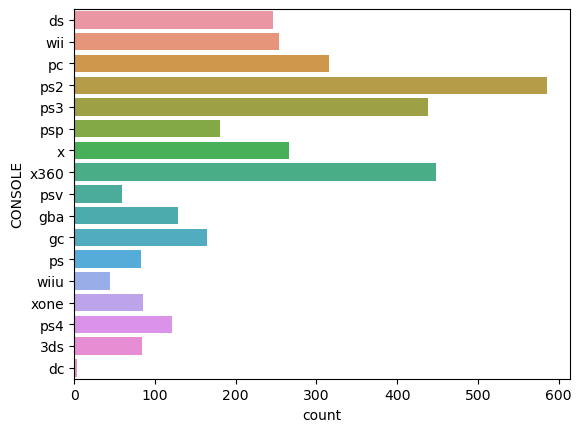

In [10]:
sns.countplot(data=df,y='CONSOLE')

<Axes: xlabel='CONSOLE', ylabel='count'>

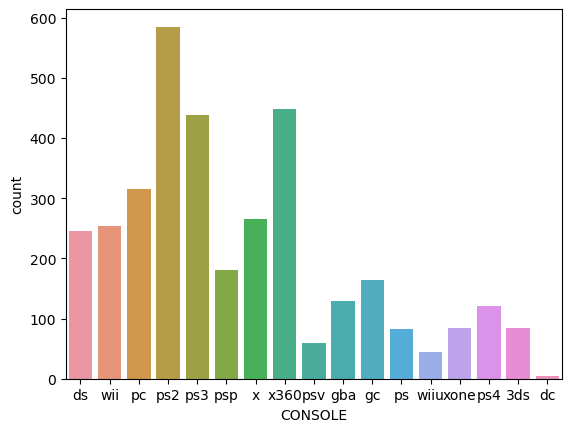

In [11]:
sns.countplot(data=df,x='CONSOLE')

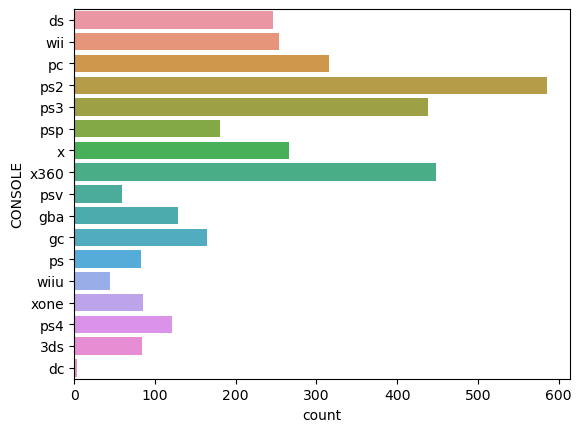

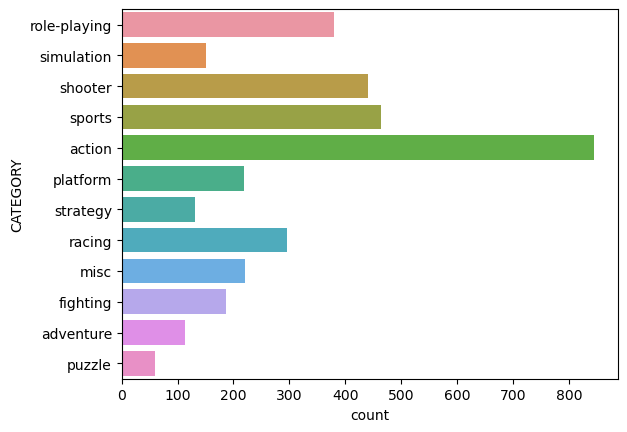

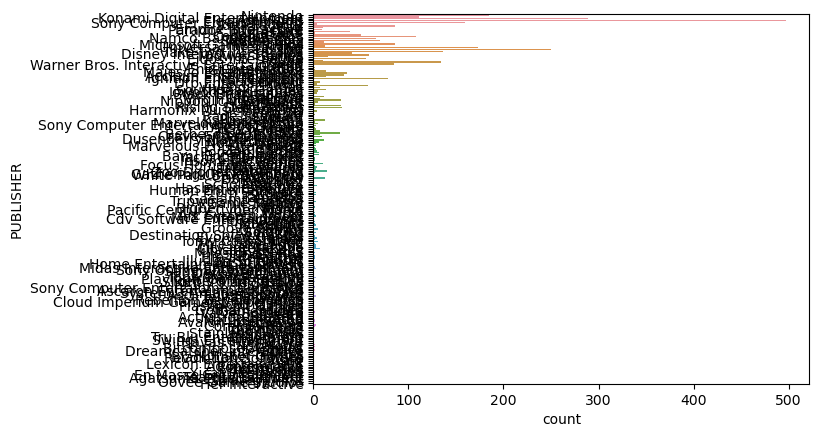

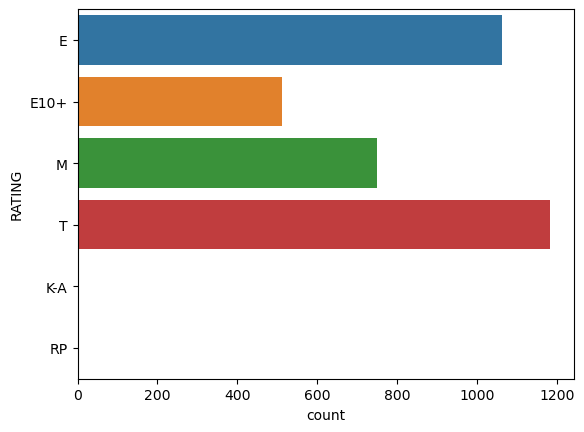

In [12]:
for col in df.select_dtypes(include='object').columns:
    sns.countplot(data=df,y=col)
    plt.show()

In [13]:
!python --version

Python 3.11.5


### insights
* PS2 console - top followed by Xbox360
* action is preferred by most, least is puzzle

In [14]:
df['YEAR'].value_counts().sort_index()

YEAR
1997      2
1998      8
1999      6
2000     23
2001     56
2002     96
2003    177
2004    224
2005    237
2006    230
2007    283
2008    309
2009    300
2010    291
2011    262
2012    215
2013    192
2014    188
2015    124
2016    124
2017     79
2018     52
2019     28
Name: count, dtype: int64

In [15]:
df['YEAR'].value_counts()

YEAR
2008    309
2009    300
2010    291
2007    283
2011    262
2005    237
2006    230
2004    224
2012    215
2013    192
2014    188
2003    177
2015    124
2016    124
2002     96
2017     79
2001     56
2018     52
2019     28
2000     23
1998      8
1999      6
1997      2
Name: count, dtype: int64

###  Analysis on Numerical columns 

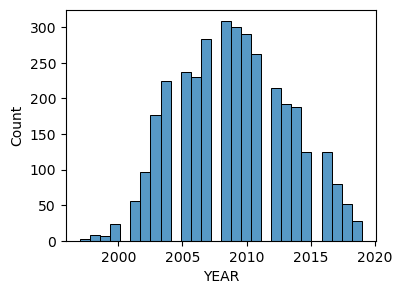

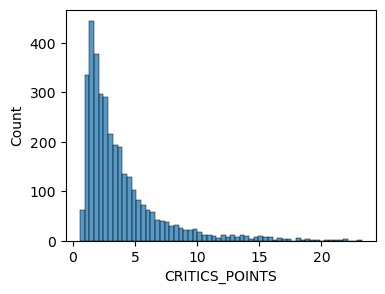

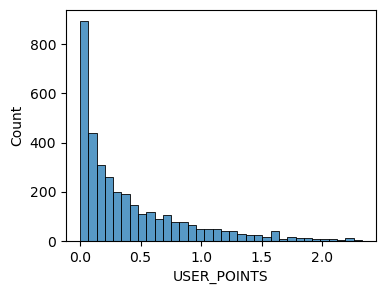

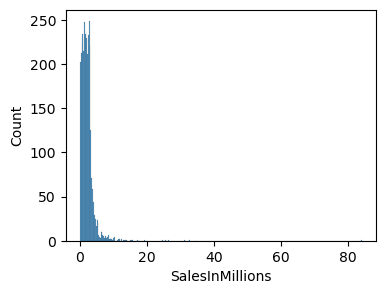

In [16]:
for col in df.drop(columns=['ID']).select_dtypes(exclude='object').columns:
    plt.figure(figsize=(4,3))
    sns.histplot(data=df,x=col)
    plt.show()

<Axes: xlabel='YEAR', ylabel='Count'>

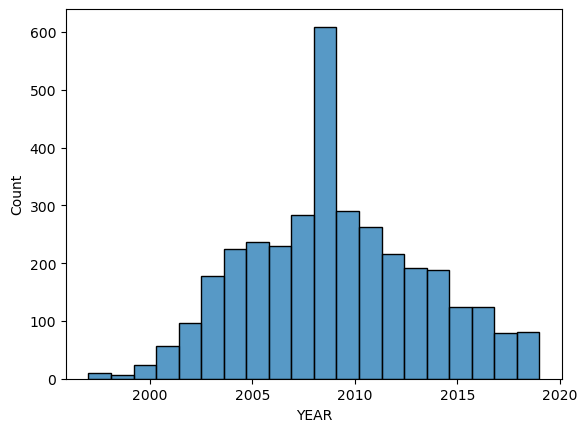

In [17]:
sns.histplot(data=df,x='YEAR', bins=20)

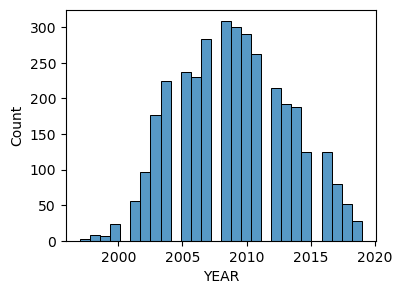

In [18]:
plt.figure(figsize=(4,3))
sns.histplot(data=df,x='YEAR')
plt.show()

* From SalesInMillions column we can see that average sales have been around 2 million and max sales have reached a mark of about 84 million and min sales were around just 1500.
* From year column we can see that data covers sales from the year 1997 to 2019
* Critic Points range from 0.5 to 23.25 while user points range from 0.0003 to 2.32. 

In [19]:
df.dtypes

ID                   int64
CONSOLE             object
YEAR                 int64
CATEGORY            object
PUBLISHER           object
RATING              object
CRITICS_POINTS     float64
USER_POINTS        float64
SalesInMillions    float64
dtype: object

### Correlation Map

<function matplotlib.pyplot.show(close=None, block=None)>

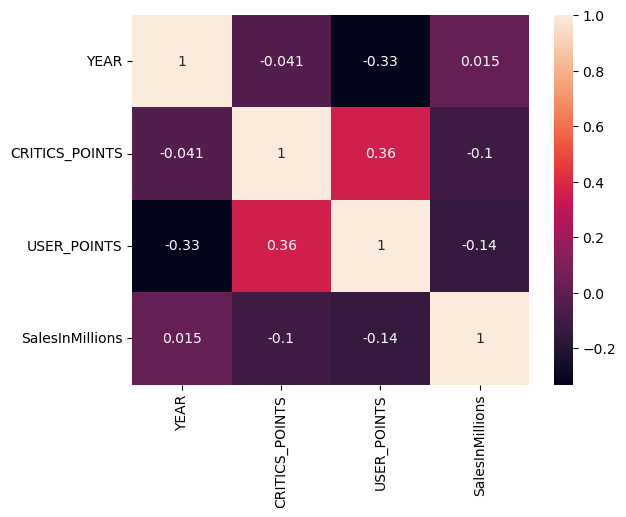

In [20]:
sns.heatmap(df.drop(columns=['ID']).select_dtypes(exclude='object').corr(),annot=True)
plt.show

### Preprocessing 

In [69]:
# check for missing values
df.isna().sum()

ID                 0
CONSOLE            0
YEAR               0
CATEGORY           0
PUBLISHER          0
RATING             0
CRITICS_POINTS     0
USER_POINTS        0
SalesInMillions    0
dtype: int64

In [68]:
# check for any duplication

df.duplicated().sum()

0

In [21]:
target_col = 'SalesInMillions'
target_col

'SalesInMillions'

In [22]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['CONSOLE', 'CATEGORY', 'PUBLISHER', 'RATING'], dtype='object')

In [23]:
ignore_cols = 'ID'
ignore_cols

'ID'

In [24]:
num_cols = df.drop(columns=ignore_cols).select_dtypes(exclude='object').columns
num_cols

Index(['YEAR', 'CRITICS_POINTS', 'USER_POINTS', 'SalesInMillions'], dtype='object')

In [25]:
df.nunique()

ID                 2654
CONSOLE              17
YEAR                 23
CATEGORY             12
PUBLISHER           204
RATING                6
CRITICS_POINTS     1683
USER_POINTS        2182
SalesInMillions    3506
dtype: int64

### find which columns to encode

In [26]:
ALLOWED_MAX_UNIQUE_SIZE = 25
ucols_2_encd = []

for col in df.columns:
    ulen = df[col].nunique()
    #print(col, '=', ulen, df[col].unique())
    if ulen <= ALLOWED_MAX_UNIQUE_SIZE:
        ucols_2_encd.append(col)
        print(col, df[col].dtypes)

CONSOLE object
YEAR int64
CATEGORY object
RATING object


In [27]:
ucols_2_encd

['CONSOLE', 'YEAR', 'CATEGORY', 'RATING']

In [28]:
ucols_2_encd.append('PUBLISHER')
ucols_2_encd

['CONSOLE', 'YEAR', 'CATEGORY', 'RATING', 'PUBLISHER']

In [29]:
ucols_2_encd.pop()
ucols_2_encd

['CONSOLE', 'YEAR', 'CATEGORY', 'RATING']

In [30]:
ucols_2_scl = ['CRITICS_POINTS', 'USER_POINTS']
ucols_2_scl

['CRITICS_POINTS', 'USER_POINTS']

### Pipelining

In [32]:
cat_pipe_encode = Pipeline(
steps=[('ohe', OneHotEncoder())])

In [33]:
num_pipe_encode = Pipeline(
steps=[('scale', StandardScaler())])

In [34]:
preprocess = ColumnTransformer(
transformers=[
    ('num_encode',num_pipe_encode, ucols_2_scl),
    ('cat_encode',cat_pipe_encode, ucols_2_encd),
])

#### Linear Regression 

In [35]:
model_pipeline = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('lin_reg', LinearRegression())
])

In [36]:
X = df.drop(columns=[ignore_cols, target_col],axis=1)
#X = df.drop(columns=['ID' 'SalesInMillions'],axis=1) # axis: 0-rows, 1-cols
X

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
0,ds,2008,role-playing,Nintendo,E,2.833333,0.303704
1,wii,2012,simulation,Konami Digital Entertainment,E10+,13.200000,1.640000
2,pc,2019,shooter,Activision,M,4.562500,0.006410
3,ps2,2002,sports,Electronic Arts,E,4.181818,0.326923
4,ps3,2013,action,Activision,M,2.259259,0.032579
...,...,...,...,...,...,...,...
3501,ds,2007,role-playing,Square Enix,E10+,1.702128,0.065421
3502,3ds,2018,action,Nintendo,E10+,3.625000,0.090000
3503,ps3,2012,action,Warner Bros. Interactive Entertainment,E10+,2.814815,0.172917
3504,3ds,2016,simulation,Marvelous Entertainment,E10+,2.571429,0.464286


In [37]:
y = df[[target_col]]
y

,SalesInMillions
0,1.779257
1,0.215050
2,0.534402
3,1.383964
4,0.082671
...,...
3501,3.584264
3502,2.701472
3503,1.631668
3504,2.899156


#### Train Test Split 

In [38]:
train_X, val_X, train_y, val_y = train_test_split(X,y, test_size=0.1, random_state=42)
train_X.shape , val_X.shape , train_y.shape , val_y.shape 

((3155, 7), (351, 7), (3155, 1), (351, 1))

In [39]:
train_X

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
557,wii,2011,action,Codemasters,T,2.266667,0.526667
650,ps3,2011,shooter,Lucasarts,T,1.550000,0.322222
3476,psv,2018,fighting,Arc System Works,T,10.857143,0.754545
1200,ps2,2004,adventure,Sony Computer Entertainment,E,3.466667,0.720000
2309,x360,2007,racing,Thq,E,1.600000,0.592308
...,...,...,...,...,...,...,...
1095,wii,2009,fighting,Tomy Corporation,T,3.217391,0.296296
1130,pc,2005,simulation,Electronic Arts,T,4.166667,0.354545
1294,pc,2018,action,Microsoft Game Studios,M,4.714286,0.007971
860,ps3,2015,fighting,Arc System Works,T,5.187500,0.129688


In [40]:
train_y

,SalesInMillions
557,0.673040
650,0.136034
3476,2.862417
1200,0.089305
2309,1.531430
...,...
1095,2.053919
1130,5.370461
1294,0.303964
860,3.146398


In [41]:
ignore_cols

'ID'

In [42]:
model_pipeline.fit(train_X, train_y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num_encode',
                                                  Pipeline(steps=[('scale',
                                                                   StandardScaler())]),
                                                  ['CRITICS_POINTS',
                                                   'USER_POINTS']),
                                                 ('cat_encode',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder())]),
                                                  ['CONSOLE', 'YEAR',
                                                   'CATEGORY', 'RATING'])])),
                ('lin_reg', LinearRegression())])

#### Model Evaluation 

In [45]:
predicted_train_sales = model_pipeline.predict(train_X)
print('Train RMSE', mean_squared_error(train_y,predicted_train_sales,squared=False))

Train RMSE 2.507498322288594


In [46]:
predicted_val_sales = model_pipeline.predict(val_X)
print('Val RMSE', mean_squared_error(val_y,predicted_val_sales,squared=False))

Val RMSE 1.4303604895214639


In [47]:
rep = []
rep.append(['Plain LR', 2.50, 1.43, 2.50-1.43])
rep

[['Plain LR', 2.5, 1.43, 1.07]]

### Polynomial Regression

In [48]:
preprocess_poly1_cat = ColumnTransformer(
    transformers=[
        ('cat_encode_poly', cat_pipe_encode, ucols_2_encd)
    ])

preprocess_poly1_num = ColumnTransformer(
    transformers=[
        ('num_encode_poly', num_pipe_encode, ucols_2_scl)
    ])


In [50]:
for i in range(2,4):
    model_pipeline_poly1 = Pipeline(
    steps=[
        ('preprocessing_poly1', preprocess_poly1_cat),
        ('poly',PolynomialFeatures(degree=i, include_bias=False)),
        ('preprocessing_poly2', StandardScaler(with_mean=False)),
        ('lin_reg', LinearRegression())        
    ])
    
    model_pipeline_poly1.fit(train_X, train_y)
    
    predicted_train_poly_sales = model_pipeline_poly1.predict(train_X)
    trmse = mean_squared_error(train_y,predicted_train_poly_sales,squared=False)
    print('Train Poly-d=>',i, ' RMSE:', trmse)
    
    predicted_val_poly_sales = model_pipeline_poly1.predict(val_X)
    vrmse = mean_squared_error(val_y,predicted_val_poly_sales,squared=False)
    print('Val Poly-d=>',i, ' RMSE:', vrmse)
    
    print('-'*60)
    
    rep.append(['Poly-d=>'+str(i), trmse, vrmse, trmse - vrmse])

Train Poly-d=> 2  RMSE: 2.333965703313782
Val Poly-d=> 2  RMSE: 1.8130849391096244
------------------------------------------------------------
Train Poly-d=> 3  RMSE: 1.6286974400281284
Val Poly-d=> 3  RMSE: 2.7559054124840996
------------------------------------------------------------


In [51]:
rep

[['Plain LR', 2.5, 1.43, 1.07],
 ['Poly-d=>2', 2.333965703313782, 1.8130849391096244, 0.5208807642041575],
 ['Poly-d=>3', 1.6286974400281284, 2.7559054124840996, -1.1272079724559712]]

In [52]:
report = pd.DataFrame(rep)
report.columns = ['Model', 'Train_RMSE', 'Val_RMSE', 'Diff']
report

,Model,Train_RMSE,Val_RMSE,Diff
0,Plain LR,2.500000,1.430000,1.070000
1,Poly-d=>2,2.333966,1.813085,0.520881
2,Poly-d=>3,1.628697,2.755905,-1.127208


### Lasso Regularization on Polynomial Features 

In [54]:
model_pipeline_poly_L1 = Pipeline(
steps=[
    ('preprocessing_poly1', preprocess_poly1_cat),
    ('poly',PolynomialFeatures(degree=2, include_bias=False)),
    ('preprocessing_poly2', StandardScaler(with_mean=False)),
    ('L1', Lasso())        
])

model_pipeline_poly_L1.fit(train_X, train_y)

predicted_train_poly_L1_sales = model_pipeline_poly_L1.predict(train_X)
l1_trmse = mean_squared_error(train_y,predicted_train_poly_L1_sales,squared=False)
print('Train L1 Poly-d=>',i, ' RMSE:', l1_trmse)

predicted_val_poly_L1_sales = model_pipeline_poly_L1.predict(val_X)
l1_vrmse = mean_squared_error(val_y,predicted_val_poly_L1_sales,squared=False)
print('Val L1 Poly-d=>',i, ' RMSE:', l1_vrmse)

rep.append(['L1 Poly-d=>2', l1_trmse, l1_vrmse, l1_trmse - l1_vrmse])
rep

Train L1 Poly-d=> 3  RMSE: 2.5890767156774084
Val L1 Poly-d=> 3  RMSE: 1.3895590607433654


[['Plain LR', 2.5, 1.43, 1.07],
 ['Poly-d=>2', 2.333965703313782, 1.8130849391096244, 0.5208807642041575],
 ['Poly-d=>3', 1.6286974400281284, 2.7559054124840996, -1.1272079724559712],
 ['L1 Poly-d=>2', 2.5890767156774084, 1.3895590607433654, 1.199517654934043]]

### Ridge Regularization 

In [55]:
model_pipeline_L2 = Pipeline(
steps=[
    ('preprocess',preprocess),
    ('Ridge', Ridge())
])

model_pipeline_L2.fit(train_X, train_y)

predicted_train_L2_sales = model_pipeline_L2.predict(train_X)
l2_trmse = mean_squared_error(train_y,predicted_train_L2_sales,squared=False)
print('Train L2 RMSE:', l2_trmse)

predicted_val_L2_sales = model_pipeline_L2.predict(val_X)
l2_vrmse = mean_squared_error(val_y,predicted_val_L2_sales,squared=False)
print('Val L2 RMSE:', l2_vrmse)

rep.append(['Ridge', l2_trmse, l2_vrmse, l2_trmse - l2_vrmse])
rep

Train L2 RMSE: 2.507614587828972
Val L2 RMSE: 1.4267406695926168


[['Plain LR', 2.5, 1.43, 1.07],
 ['Poly-d=>2', 2.333965703313782, 1.8130849391096244, 0.5208807642041575],
 ['Poly-d=>3', 1.6286974400281284, 2.7559054124840996, -1.1272079724559712],
 ['L1 Poly-d=>2', 2.5890767156774084, 1.3895590607433654, 1.199517654934043],
 ['Ridge', 2.507614587828972, 1.4267406695926168, 1.0808739182363551]]

In [56]:
#rep.pop()

#### Models Analysis 

In [57]:
report = pd.DataFrame(rep)
report.columns = ['Model', 'Train_RMSE', 'Val_RMSE', 'Diff']
report

,Model,Train_RMSE,Val_RMSE,Diff
0,Plain LR,2.500000,1.430000,1.070000
1,Poly-d=>2,2.333966,1.813085,0.520881
2,Poly-d=>3,1.628697,2.755905,-1.127208
3,L1 Poly-d=>2,2.589077,1.389559,1.199518
4,Ridge,2.507615,1.426741,1.080874


### Model Pickling

In [66]:
joblib.dump(model_pipeline_L2, 'vgsales_pipeline_model.pkl')

['vgsales_pipeline_model.pkl']

In [67]:
train_X

,CONSOLE,YEAR,CATEGORY,PUBLISHER,RATING,CRITICS_POINTS,USER_POINTS
557,wii,2011,action,Codemasters,T,2.266667,0.526667
650,ps3,2011,shooter,Lucasarts,T,1.550000,0.322222
3476,psv,2018,fighting,Arc System Works,T,10.857143,0.754545
1200,ps2,2004,adventure,Sony Computer Entertainment,E,3.466667,0.720000
2309,x360,2007,racing,Thq,E,1.600000,0.592308
...,...,...,...,...,...,...,...
1095,wii,2009,fighting,Tomy Corporation,T,3.217391,0.296296
1130,pc,2005,simulation,Electronic Arts,T,4.166667,0.354545
1294,pc,2018,action,Microsoft Game Studios,M,4.714286,0.007971
860,ps3,2015,fighting,Arc System Works,T,5.187500,0.129688
